In [338]:
import pandas as pd
import numpy as np

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
import seaborn as sns

In [339]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [340]:
house_data_root = pd.read_csv('./train.csv')
house_data_root.shape

(1460, 81)

In [341]:
missing_table = pd.DataFrame({
            'count': house_data_root.isnull().sum(),
            'percentage': (house_data_root.isnull().sum() / len(house_data_root['Id'])) * 100
})

In [342]:
missing_table

,count,percentage
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,93.767123
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


In [343]:
house_data1 = house_data_root.copy()

<h3>delete features that have more than 20% of missing value</h3>

In [344]:
for feature in missing_table.index:
    if (missing_table.loc[feature, 'percentage'] >= 20):
        house_data1.drop(columns=feature, inplace=True)

In [345]:
house_data1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [346]:
house_data1.shape

(1460, 76)

<h3>TARGET</h3>

In [347]:
y = np.array(house_data1['SalePrice'])
y.shape

(1460,)

<h3>missing value processing and features transforming</h3>

In [348]:
numerical_features = make_column_selector(dtype_include=np.number)
category_features = make_column_selector(dtype_exclude=np.number)

numerical_pipeline = make_pipeline(KNNImputer(n_neighbors=50), StandardScaler())
category_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

#numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
#category_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(category_pipeline, category_features))
preprocessor.fit(house_data1.iloc[:, 1:-1])

X = preprocessor.transform(house_data1.iloc[:, 1:-1]).toarray()
X.shape

(1460, 270)

Select best k features that have highest relationship with target

In [349]:
selector = SelectKBest(f_regression, k = 100)
selector.fit(X, y)
X_best = selector.transform(X)
X_best.var(axis=0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.16685072,
       0.12702008, 0.22161006, 0.23216129, 0.06023832, 0.03814787,
       0.06380184, 0.02470023, 0.13035982, 0.02729358, 0.04995825,
       0.07140692, 0.05543442, 0.01683008, 0.13736161, 0.09435354,
       0.21189482, 0.17075389, 0.15751736, 0.0040927 , 0.04003518,
       0.12797898, 0.22831441, 0.12118784, 0.12509101, 0.22603866,
       0.116725  , 0.21189482, 0.24054044, 0.07998499, 0.03434791,
       0.2225258 , 0.23546819, 0.01881028, 0.09      , 0.24567649,
       0.24676816, 0.07600816, 0.02339792, 0.24411522, 0.24909176,
       0.02987193, 0.12845703, 0.0833571 , 0.21804232, 0.09109401,
       0.2043329 , 0.08279743, 0.21755067, 0.24994324, 0.03243

In [350]:
X_best.shape

(1460, 100)

<h3>Split train set and test set</h3>

In [351]:
x_train, x_test, y_train, y_test = train_test_split(X_best, y, test_size=0.25, random_state=5)
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(1095, 100)

(1095,)

(365, 100)

(365,)

In [352]:
lr = RandomForestRegressor(random_state=5).fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [353]:
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, y_pred)))

Mean Squared Error (MSE): 602666737.7751107


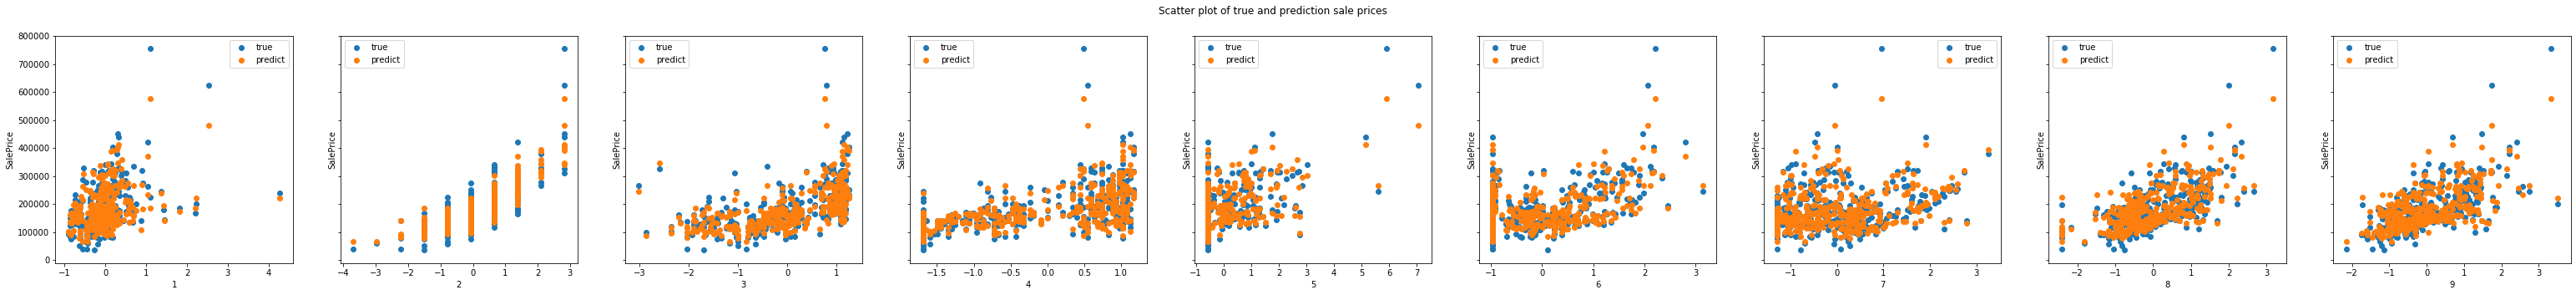

In [354]:
row, col = (1, 10)
start = 1
fig, axes = plt.subplots(row, col - start, figsize=(6 * (col - start), 5), sharey=True)
fig.suptitle("Scatter plot of true and prediction sale prices")

for c in range(start, col):
    axes[c - start].scatter(x_test[:, c], y_test, label="true")
    axes[c - start].scatter(x_test[:, c], y_pred, label="predict")
    axes[c - start].set_xlabel(str(c))
    axes[c - start].set_ylabel("SalePrice")
    axes[c - start].legend()

<h3>Submission</h3>

In [355]:
lr_submission = RandomForestRegressor(random_state=5).fit(X_best, y)

In [356]:
test_data = pd.read_csv('./test.csv')
test_data.shape

(1459, 80)

In [357]:
X_test = test_data[house_data1.columns[1:-1]]
X_test.shape

(1459, 74)

In [358]:
X_test_processed = preprocessor.transform(X_test).toarray()
X_test_processed.shape

(1459, 270)

In [359]:
selector.get_support().shape

(270,)

In [360]:
X_test_best = np.array(X_test_processed)[:, selector.get_support()]
X_test_best.shape

(1459, 100)

In [361]:
y_submission = lr_submission.predict(X_test_best)
y_submission.shape

(1459,)

In [362]:
df_sub = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_submission
})

In [363]:
df_sub.to_csv('./submission.csv', index=False)